# PCA降维
降维的动机：
    1. 使得数据集更易用
    2. 降低算法计算开销
    3. 去除噪声
    4. 使得结果易懂
    
PCA：<br>
> 优点：降低数据复杂性，识别最重要的多个特征<br>
> 缺点：不一定需要，且有可能损失信息<br>
> 适用数据类型：数值型<br>

伪代码：
```
去除平均值
计算协方差矩阵
计算协方差矩阵的特征值和特征向量
将特征值从大到小排序
保留最上面的N个特征向量
将数据转换到上述N个向量组成的新空间中
```

## 1. PCA实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

def pca(dataMat, topNfeat=9999999):
    """
    PCA
    
    Parameters
    -----------
        dataMat : 原数据集矩阵
        topNfeat : 应用的N个特征
    Returns
    -----------
        lowDDataMat : 降维后的数据集
        reconMat : 新的数据集空间
    """
    # 计算每列的均值
    meanVals = np.mean(dataMat, axis=0)
    # 去除平均值
    meanRemoved = dataMat - meanVals
    # 计算协方差矩阵
    # 这里是向量计算的方式
    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度，是一个对称矩阵

    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = np.cov(meanRemoved, rowvar=0)
    # 计算协方差矩阵的特征值和特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    eigValInd = np.argsort(eigVals)
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    '''
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])  # index,1 = 1; index,2 = 2; index,0 = 3
    >>> y = np.argsort(x)
    >>> y[::-1]
    array([0, 2, 1])
    >>> y[:-3:-1]
    array([0, 2])  # 取出 -1, -2
    >>> y[:-6:-1]
    array([0, 2, 1])
    '''
    eigValInd = eigValInd[:-(topNfeat + 1):-1]
    # 重组特征向量从特征最大到最小
    redEigVects = eigVects[:, eigValInd]
    # 使用特征向量对数据集进行变换
    lowDDataMat = meanRemoved * redEigVects
    # 重构原始数据用于调试
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [3]:
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca(dataMat, 1)
lowDMat.shape

(1000, 1)

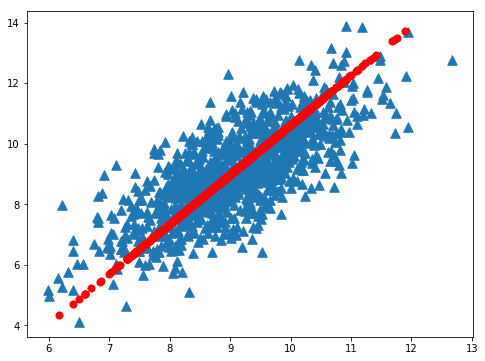

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

## 2. 利用PCA对半导体制造数据降维
首先进行数据清洗

In [7]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = datMat.shape[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        # 对value为Nan的值赋为均值
        datMat[np.nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [8]:
dataMat = replaceNanWithMean()

In [9]:
meanVals = np.mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = np.cov(meanRemoved, rowvar=0)
eigVals, eigVects = np.linalg.eig(np.mat(covMat))
eigVals

array([  5.34151979e+07,   2.17466719e+07,   8.24837662e+06,
         2.07388086e+06,   1.31540439e+06,   4.67693557e+05,
         2.90863555e+05,   2.83668601e+05,   2.37155830e+05,
         2.08513836e+05,   1.96098849e+05,   1.86856549e+05,
         1.52422354e+05,   1.13215032e+05,   1.08493848e+05,
         1.02849533e+05,   1.00166164e+05,   8.33473762e+04,
         8.15850591e+04,   7.76560524e+04,   6.66060410e+04,
         6.52620058e+04,   5.96776503e+04,   5.16269933e+04,
         5.03324580e+04,   4.54661746e+04,   4.41914029e+04,
         4.15532551e+04,   3.55294040e+04,   3.31436743e+04,
         2.67385181e+04,   1.47123429e+04,   1.44089194e+04,
         1.09321187e+04,   1.04841308e+04,   9.48876548e+03,
         8.34665462e+03,   7.22765535e+03,   5.34196392e+03,
         4.95614671e+03,   4.23060022e+03,   4.10673182e+03,
         3.41199406e+03,   3.24193522e+03,   2.74523635e+03,
         2.35027999e+03,   2.16835314e+03,   1.86414157e+03,
         1.76741826e+03,

从上面的输出可以看出，有很多特征值都是0，意味着这些特征都是其他特征的副本，它们本身并没有提供额外的信息，也就是说它们是冗余的。